# Loan Risk Analysis (CreValu)

### Agile Software Prototyping Project

Objective: This project is to assess loan applications with precision, enabling strategic decision-making based on comprehensive risk analysis.

dataset: https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

### Get the data

In [178]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [140]:
df = pd.read_csv("./data/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### EDA exploration

In [141]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [142]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

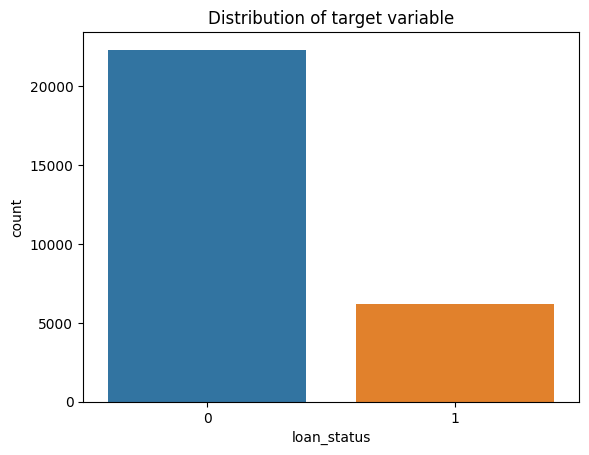

In [179]:
sns.countplot(data = df, x='loan_status')
plt.title("Distribution of target variable")
plt.show()

### Data preprocessing

- remove missing values and duplicate values

In [143]:
df = df.drop_duplicates().reset_index(drop=True)

In [144]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

- convert categorical variables into numerical variables

In [145]:
label_enc = LabelEncoder()
cols = df.select_dtypes(include='object').columns
for col in cols:
    df[col] = label_enc.fit_transform(df[col])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


* feature selection

<Axes: >

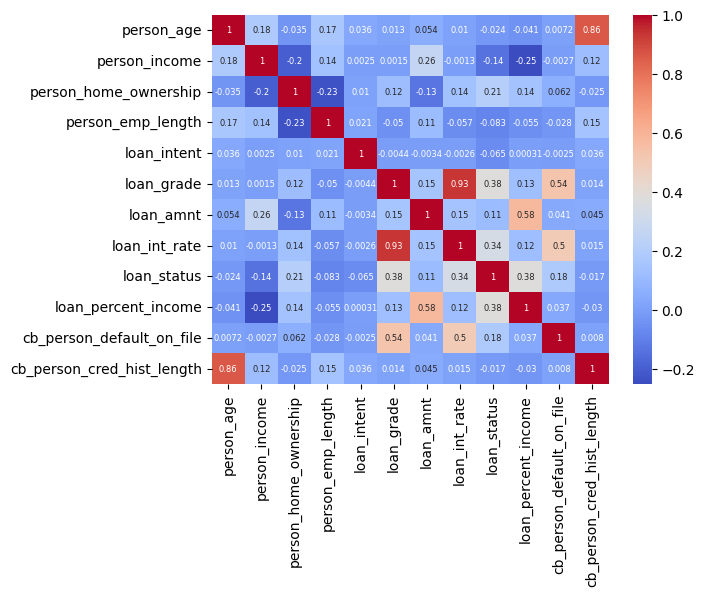

In [146]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 6})

* 'person income', 'person_home_ownership', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', and 'cb_person_default_on_file' show some level of correlation with 'loan_status'.
* However, 'person income', 'loan_amnt', 'loan_percent_income' have a considerable correlation. So, only select 'loan_percent_income'.
* Additionally, 'loan_int_rate' have a consider correlation with 'loan_grade'. So, only select 'loan_grade'.

Therefore, I selected 'person_home_ownership', 'loan_grade', 'loan_percent_income' and cb_person_default_on_file'.

* split the data

In [147]:
X = df[['person_home_ownership', 'loan_grade', 'loan_percent_income', 'cb_person_default_on_file']]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Normalization

In [148]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Run the model (compared three models)

In [149]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [150]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [151]:
model_SVC = SVC(probability=True)
model_SVC.fit(X_train, y_train)

SVC(probability=True)

### Evaluate the model

#### 1) Logistic Regression

In [152]:
y_pred_LR = model_LR.predict(X_test)

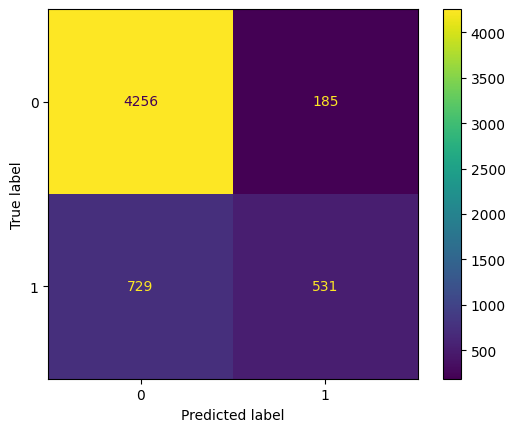

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)

In [154]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4441
           1       0.74      0.42      0.54      1260

    accuracy                           0.84      5701
   macro avg       0.80      0.69      0.72      5701
weighted avg       0.83      0.84      0.82      5701



In [175]:
y_proba_LR = model_LR.predict_proba(X_test)[:,1]

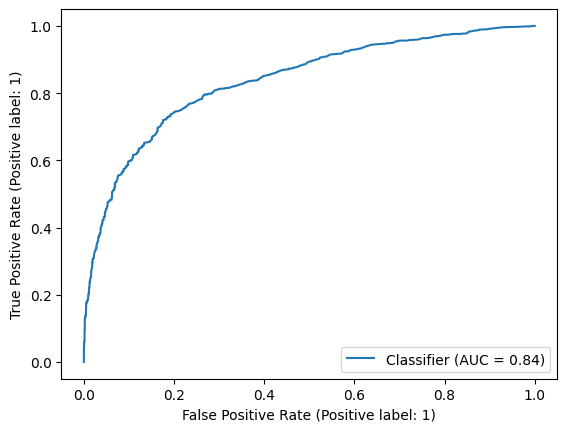

In [176]:
RocCurveDisplay.from_predictions(y_test, y_proba_LR)

#### 2) Random Forest Classifier

In [157]:
y_pred_RFC = model_RFC.predict(X_test)

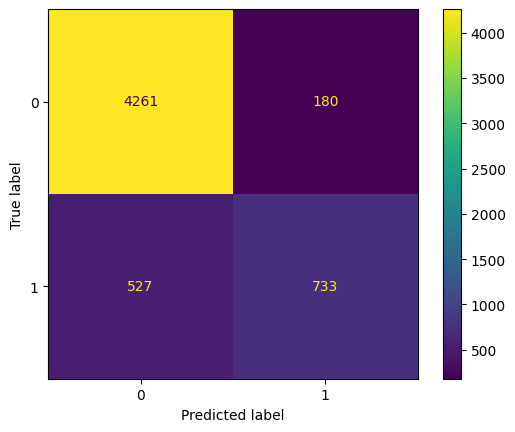

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RFC)

In [159]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      4441
           1       0.80      0.58      0.67      1260

    accuracy                           0.88      5701
   macro avg       0.85      0.77      0.80      5701
weighted avg       0.87      0.88      0.87      5701



In [173]:
y_proba_RFC = model_RFC.predict_proba(X_test)[:,1]

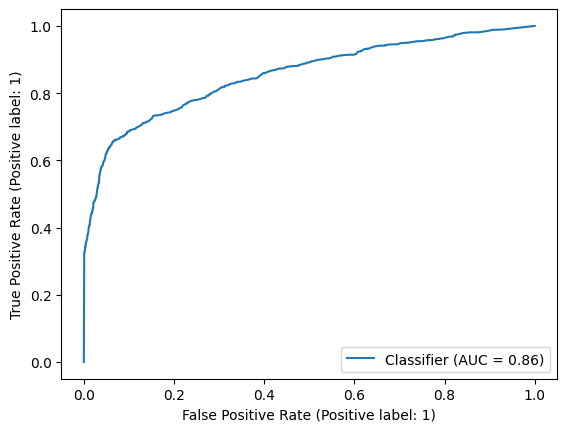

In [174]:
RocCurveDisplay.from_predictions(y_test, y_proba_RFC)

#### Support Vector Machine

In [162]:
y_pred_SVC = model_SVC.predict(X_test)

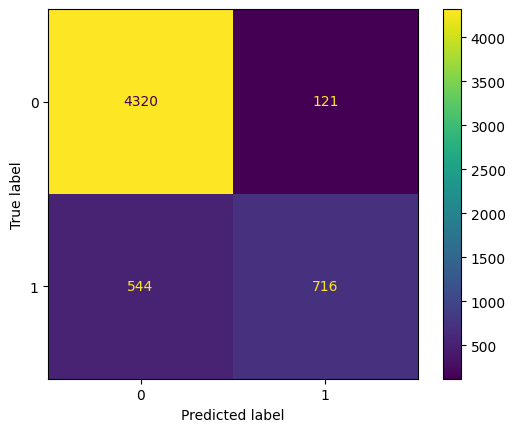

In [163]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVC)

In [164]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4441
           1       0.86      0.57      0.68      1260

    accuracy                           0.88      5701
   macro avg       0.87      0.77      0.81      5701
weighted avg       0.88      0.88      0.87      5701



In [168]:
y_proba_SVC = model_SVC.predict_proba(X_test)[:,1]

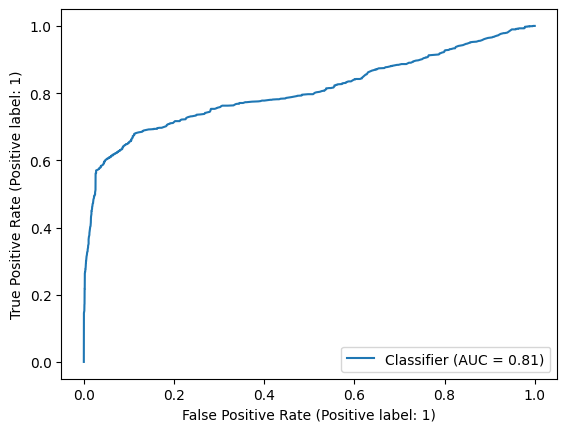

In [172]:
RocCurveDisplay.from_predictions(y_test, y_proba_SVC)

### Conclusion

In [167]:
results_df = pd.DataFrame({
    "Model": ["LogisticRegression", "RandomForestClassifier","SupportVectorMachine"],
    "accuracy": [accuracy_score(y_test, y_pred_LR), accuracy_score(y_test, y_pred_RFC), accuracy_score(y_test, y_pred_SVC)],
    "precision": [precision_score(y_test, y_pred_LR), precision_score(y_test, y_pred_RFC), precision_score(y_test, y_pred_SVC)],
    "recall": [recall_score(y_test, y_pred_LR), recall_score(y_test, y_pred_RFC), recall_score(y_test, y_pred_SVC)],
    "f1":[f1_score(y_test, y_pred_LR), f1_score(y_test, y_pred_RFC), f1_score(y_test, y_pred_SVC)],
    "roc_auc":[roc_auc_score(y_test, y_proba_LR), roc_auc_score(y_test, y_proba_RFC), roc_auc_score(y_test, y_proba_SVC)]
})

results_df

,Model,accuracy,precision,recall,f1,roc_auc
0,LogisticRegression,0.839677,0.741620,0.421429,0.537449,0.836566
1,RandomForestClassifier,0.875987,0.802848,0.581746,0.674643,0.855126
2,SupportVectorMachine,0.883354,0.855436,0.568254,0.682880,0.805165


In conclusion, our goal is to minimize default risks, the <b>Random Forest Classifier</b> stands out with the highest ROC-AUC value, indicating superior capability in distinguishing between non-default and default loans. Despite its slightly lower precision compared to the Support Vector Machine, the Random Forest model presents a balanced performance with good recall, ensuring fewer defaults are missed. Therefore, the Random Forest model could offer the flexibility and robustness necessary for our goals, particularly when managing a diverse loan applications with varying risk applications.